## Netflix Subscription Forecasting
This project aim estimate the expected number of subscriber of Netflix in the given period through ARIMA and SARIMA model and present in-depth analysis.

### 1. Data Processing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import sys
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
df = pd.read_csv('Data/Netflix-Subscriptions.csv')
df.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


The dataset contain netflix quarterly subscription data from 2013 to 2023. Before first step analysis, we need to convert the time period data from str to datetime format.

In [24]:
df['Date'] = pd.to_datetime(df['Time Period'],format='%d/%m/%Y')
df.head()

,Time Period,Subscribers,Date
0,01/04/2013,34240000,2013-04-01
1,01/07/2013,35640000,2013-07-01
2,01/10/2013,38010000,2013-10-01
3,01/01/2014,41430000,2014-01-01
4,01/04/2014,46130000,2014-04-01


### 2. Exploratory Data Analysis

In [25]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'],
                         y=df['Subscribers'],
                         mode='lines', name='Subscribers'))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth',
                  xaxis_title='Date',
                  yaxis_title='Netflix Subscriptions')
fig.show()

In [26]:
df['Quarterly Growth Rate'] = df['Subscribers'].pct_change() * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
df['Bar Color'] = df['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot the quarterly growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['Quarterly Growth Rate'],
    marker_color=df['Bar Color'],
    name='Quarterly Growth Rate'
))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth Rate',
                  xaxis_title='Time Period',
                  yaxis_title='Quarterly Growth Rate (%)')
fig.show()
     

#### Seasonality:
From two graph above, we can see that even though the seasonality is not obivious in Subscription growth, the growth rate plot shows the growth rate reaches a peak in every Spring season. Therefore, SARIMA instead of ARIAM should be adopted to analyze the data.

#### Pandemic Interruption
The outbreak of the pendamic should be considered as introducing external impact to the market. Therefore, the SARIMA assumption that the future resemble the past fails. Subsciption data between Jul 2013 to Jan 2020 should be included in the model.

### 3. SARIMA for Netflix Subscriptions
To start modeling, we need to convert data into time series format.

In [33]:
prior_pandemic = df[df['Date']<='2020-01-01']

In [42]:
time_series = prior_pandemic.set_index('Date')['Subscribers']

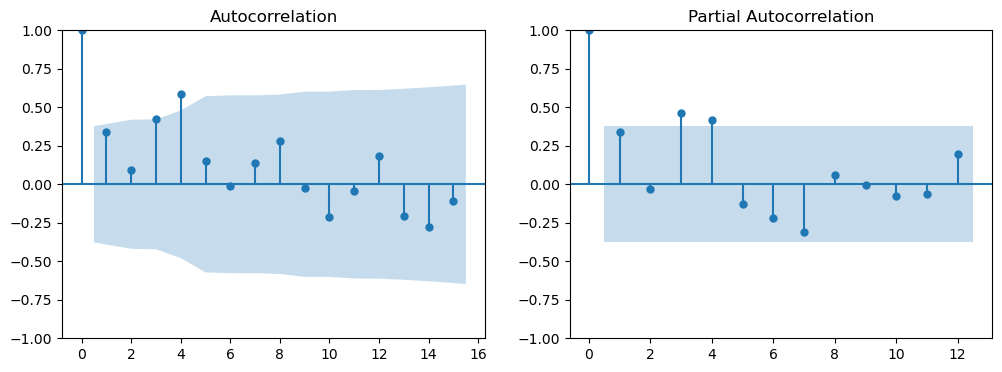

In [48]:
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1], lags=12)
plt.show()

### Limit of ARIMA: 

The model assumes the future resemble the past. Therefore, it might fail when there are external force that interrupting the market like financial crisis or growth new business model in the market.